In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.cluster import KMeans
from sklearn import metrics


In [148]:
imdb_df = pd.read_csv("A:/Documents/School/Project401/ML-For-Beginners/5-Clustering/data/imdb_top250_movies.csv")
imdb_df.head()

,Unnamed: 0,Num,Title,Year,Released,Runtime,Genre,Director,Writer,Actors,...,Awards,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website
0,0,1,The Shawshank Redemption,1994,14 Oct 1994,142 min,"Crime, Drama",Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...","Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",...,Nominated for 7 Oscars. Another 19 wins & 30 n...,80.0,9.3,"1,825,626",tt0111161,movie,27 Jan 1998,NaN,Columbia Pictures,NaN
1,1,2,The Godfather,1972,24 Mar 1972,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay), Francis Ford Coppola ...","Marlon Brando, Al Pacino, James Caan, Richard ...",...,Won 3 Oscars. Another 23 wins & 27 nominations.,100.0,9.2,"1,243,444",tt0068646,movie,09 Oct 2001,NaN,Paramount Pictures,http://www.thegodfather.com
2,2,3,The Godfather: Part II,1974,20 Dec 1974,202 min,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay), Mario Puzo ...","Al Pacino, Robert Duvall, Diane Keaton, Robert...",...,Won 6 Oscars. Another 10 wins & 20 nominations.,85.0,9.0,"856,870",tt0071562,movie,24 May 2005,NaN,Paramount Pictures,http://www.thegodfather.com/
3,3,4,The Dark Knight,2008,18 Jul 2008,152 min,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",...,Won 2 Oscars. Another 151 wins & 153 nominations.,82.0,9.0,"1,802,351",tt0468569,movie,09 Dec 2008,"$533,316,061",Warner Bros. Pictures/Legendary,http://thedarkknight.warnerbros.com/
4,4,5,12 Angry Men,1957,01 Apr 1957,96 min,"Crime, Drama",Sidney Lumet,"Reginald Rose (story), Reginald Rose (screenplay)","Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",...,Nominated for 3 Oscars. Another 16 wins & 8 no...,96.0,8.9,"494,215",tt0050083,movie,06 Mar 2001,NaN,Criterion Collection,http://www.criterion.com/films/27871-12-angry-men


In [149]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

new_columns = ['imdbVotes', 'Year', 'imdbRating', 'Metascore']

new_imdb = imdb_df.drop([c for c in imdb_df.columns if c not in new_columns], axis=1)

new_imdb.dropna(inplace=True)

y = new_imdb['imdbVotes']

new_imdb['imdbVotes'] = le.fit_transform(new_imdb['imdbVotes'])

y = le.transform(y)


In [150]:
nclusters = 2 
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(new_imdb)

# Predict the cluster for each data point

y_cluster_kmeans = km.predict(new_imdb)
y_cluster_kmeans

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1])

In [151]:
score = metrics.silhouette_score(new_imdb, y_cluster_kmeans)
score

0.5097081186553546

In [152]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(new_imdb)
    wcss.append(kmeans.inertia_)

c:\Users\G4M3R\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


c:\Users\G4M3R\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


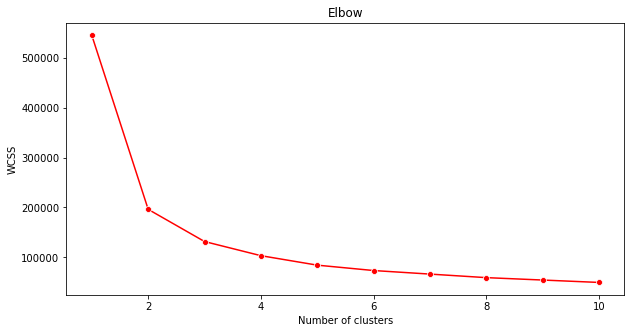

In [153]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The "elbow method" shows the bend is at around 2, which is also the optimal cluster.

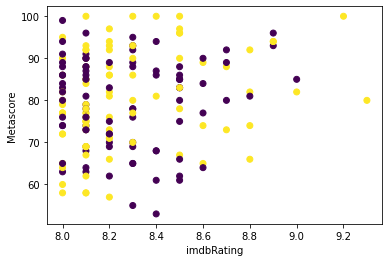

In [155]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(new_imdb)
labels = kmeans.predict(new_imdb)
plt.scatter(new_imdb['imdbRating'],new_imdb['Metascore'],c = labels)
plt.xlabel('imdbRating')
plt.ylabel('Metascore')
plt.show()

In [156]:
labels = kmeans.labels_

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 1 out of 177 samples were correctly labeled.
Accuracy score: 0.01
